In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder

# Exploratory Data Analysis

In [4]:
# Import loan data file
data = pd.read_csv('/Users/kthan/Desktop//Capstone-Project/loan_data.csv') 

In [174]:
# View a snapshot of the data
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [114]:
# Review structure of the data
data.info() # review columns, data types and dataframe shape
data.describe() # review summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [115]:
# Review the summary statistics of the categorical variables
data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


Inital Observations
* Null values are present in 7 out of the 13 columns.
    * During the data cleaning process, any rows containing null values will be dropped from the dataset, ensuring that all insights are derived from a 'complete' dataset.
* To better model the data, it would be advantageous to convert the relevant 'object' columns into numerical formats (e.g Gender, Married, Education, etc.)
    * While Loan_ID is a valuable identifier, it would not contribute significant insights and will be removed during the data cleaning process.
* The results appear reasonable; however, it's important to note the following:
    * The maximum values for ApplicantIncome, CoapplicantIncome, LoanAmount, and Loan_Amount_Term all exceed their respective variables' mean and standard deviation. This suggests the presence of potential outliers that could influence the results.
    * Even though these data points fall outside the typical range, we should not automatically assume that they are incorrect or implausible. It's conceivable to encounter high values in these columns. As a result, I will not exclude these data points.

In [90]:
# Find duplicates 
duplicate_rows = data[data.duplicated()]
len(duplicate_rows) # there are 0 duplicated rows

0

In [4]:
# Find the number of nulls in each column 
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# Remove all rows with null values
data_no_nulls = data.dropna()

In [6]:
# Check to ensure all nulls were dropped
data_no_nulls.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [43]:
# Remove Loan_ID from dataframe
data_cleaned = data_no_nulls[data_no_nulls.columns[1:]]
data_cleaned.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N
10,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y


In [143]:
# Review structure of the cleaned data
data_cleaned.info() # review columns, data types and dataframe shape
data_cleaned.describe() # review summary statistics

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5364.231250,1581.093583,144.735417,342.050000,0.854167
std,5668.251251,2617.692267,80.508164,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,81000.000000,33837.000000,600.000000,480.000000,1.000000


In [144]:
# Review the summary statistics of the categorical variables after cleaning the data
data_cleaned.describe(include='object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,480,480,480,480,480,480,480
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,394,311,274,383,414,191,332


Observations on Cleaned Datasest
* After the cleaning, there were no drastic changes in the summary statistics
* All columns have the same length which confirms that there are no missing values in the dataframe

In [ ]:
# Save the cleaned data into an excel file
data_cleaned.to_excel('loan_data_cleaned.xlsx', index=False)

**Calculate the proportions for each categorical column in order to better understand the typical loan applicant. Find calculations below the following insights:**
- 82.08% of loan applicants are male
    - While the dataset shows a significant concentration of male applicants, prospective loan applicants should prioritize their individual financial qualifications. As Gender is unlikely to significantly influence approval status.
- 64.79% of loan applicants are married
    - This may indicate that lenders often consider the combined income and financial stability of couples when evaluating loan applications.
- 57.08% of loan applicants have zero dependents. 
    - This can influence loan eligibility and borrowing capacity, as having fewer dependents typically results in lower financial responsibilities.
- 79..79% of loan applicants have are graduates
    - Lenders may consider education levels when assessing an applicant's ability to repay a loan, as higher education can lead to better job opportunities and income potential.
- 86.25 of loan applicants are not self-employed
    - Fewer self-employed individuals might be applying since these applicants most likely face greater income instability and potentially encounter more stringent requirements when applying for loans.
- 39.79% of loan applicants are looking to buy property in semi-urban areas
    - This indicates that the lender's clientele may be influenced by the bank's location, resulting in a balanced distribution of property area preferences, with a slight emphasis on semi-urban locations.
- 69.16% of loan applicants get their application approved
    - Nearly 70% of applicants receive loan approvals. However, it's important to note that approval rates may vary depending on individual financial circumstances which will require further analysis.

Understanding the characteristics of typical loan applicants can help prospective borrowers prepare and make informed decisions when seeking loan approval.

In [151]:
# Calculate the proportions for each of the categorical columns
for column in data_cleaned.select_dtypes(include='object').columns[:]:
    print(data_cleaned[column].value_counts(normalize=True))
    print('')

Male      0.820833
Female    0.179167
Name: Gender, dtype: float64

Yes    0.647917
No     0.352083
Name: Married, dtype: float64

0     0.570833
2     0.177083
1     0.166667
3+    0.085417
Name: Dependents, dtype: float64

Graduate        0.797917
Not Graduate    0.202083
Name: Education, dtype: float64

No     0.8625
Yes    0.1375
Name: Self_Employed, dtype: float64

Semiurban    0.397917
Urban        0.312500
Rural        0.289583
Name: Property_Area, dtype: float64

Y    0.691667
N    0.308333
Name: Loan_Status, dtype: float64



Find the visualizations below insights:
* The boxplots allows us to visually detect outliers among the continuous variables
    * As mentioned previously, the occurrence of outliers is likely and now evident through the boxplot diagrams. However, these values will not be excluded from the dataset as keeping them is more representative of a typically population. 
* The histograms visualize the distributions of the data's the continuous variables
   * Each histogram is skewed to the right and there appears to be outliers. In light of this finding, the median would be the preferred measure of central tendency as it would be less sensitive to outliers.
* The heatmap visualizes the correlations between the variables in the dataframe, the range can be between -1 and +1.
   * Most of the correlations in the matrix are weak, suggesting that the relationships between these variables are not strongly linear. However, it's essential to keep in mind that correlation measures only linear relationships and may not capture more complex or nonlinear associations between variables. 
   * 'LoanAmount' and 'ApplicantIncome' have the highest correlation at 0.57.
 * The pairplot diagram investigates the relationships between the numerical variables in the dataset.
   * 'Credit_History' significantly influences loan approval, as applicants without a credit history typically face denials regardless of the distribution of other variables, with only a few exceptions.
   * The pairplot re-emphasizes the lack of correlations that were indicated in the heatmap. The visualization doesn't display any obvious trends/patterns.
* The countplot diagram visualizes how different categorical factors relate to the likelihood of loan approval
   * When examining the countplots, it's essential to acknowledge the characteristics of the applicant pool. Due to the dataset's limitations, we must consider the proportion of loan approvals for each categorical variable, rather than solely focusing on the overall counts.
   * The most significant observation is that applicants without a ‘Credit_History’ receive rejections, regardless of other variables (with very few exceptions) 

In [ ]:
# Store relevant numerical columns in a list that the following functions will enumerate through to generate visualizations
numerical_columns = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount']

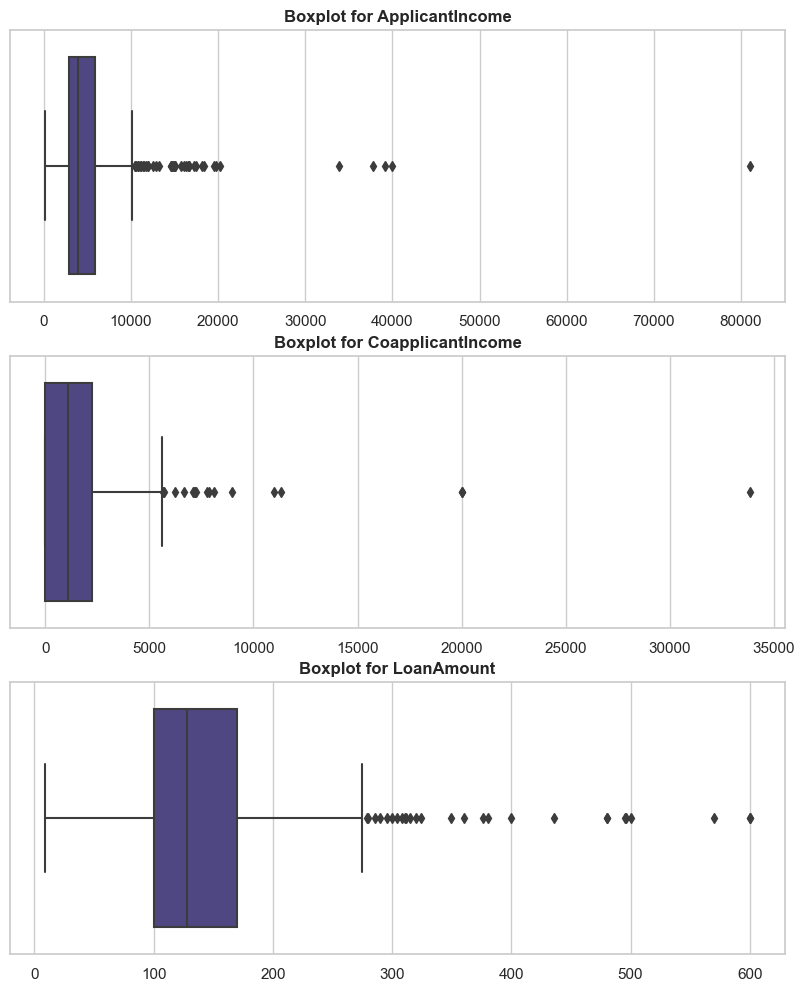

In [138]:
# Evaluate the continuous variables using boxplots to detect outliers
fig,axes = plt.subplots(3,1, figsize=(10,12))
for i, numerical_column in enumerate(numerical_columns):
    sns.boxplot(x=data_cleaned[numerical_column], ax=axes[i], color='darkslateblue')
    axes[i].set_title(f'Boxplot for {numerical_column}', weight='bold')
    axes[i].set_xlabel('') # Removes the x-axis title

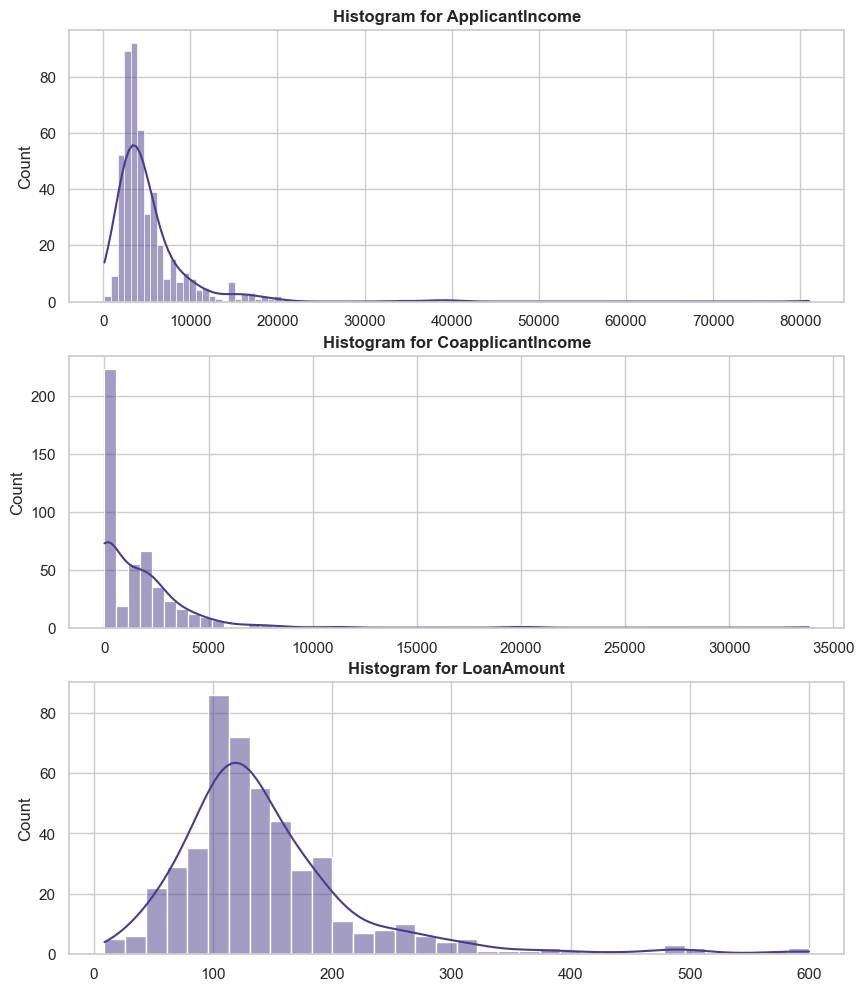

In [129]:
# Review the continuous variables using histograms to evaluate the shape of the distributions
fig,axes = plt.subplots(3,1,figsize=(10,12))
for i, numerical_column in enumerate(numerical_columns):
    sns.histplot(x=data_cleaned[numerical_column], ax=axes[i], kde=True, color='darkslateblue')
    axes[i].set_title(f'Histogram for {numerical_column}', weight='bold')
    axes[i].set_xlabel('') # Removes the x-axis title

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, *, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

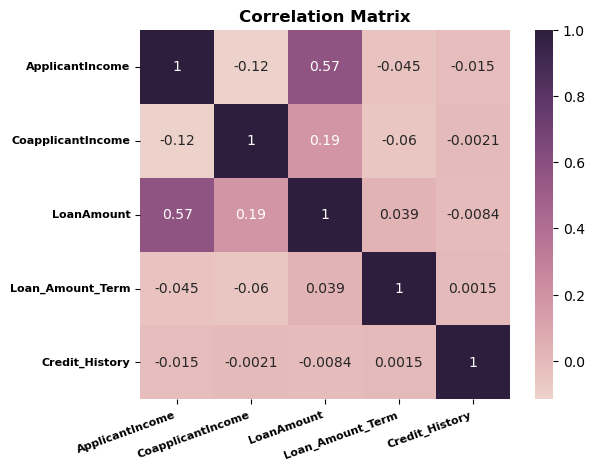

In [59]:
# Discover correlations between the variables using correlation matrix
corrmat = sns.heatmap(data.corr(), square=True, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))
corrmat.set_xticklabels(corrmat.get_xticklabels(), fontsize=8, weight='bold', rotation=20, horizontalalignment='right')
corrmat.set_yticklabels(corrmat.get_yticklabels(), fontsize=8, weight='bold', rotation=0, horizontalalignment='right')
corrmat.set_title('Correlation Matrix', weight='bold')
plt.figure

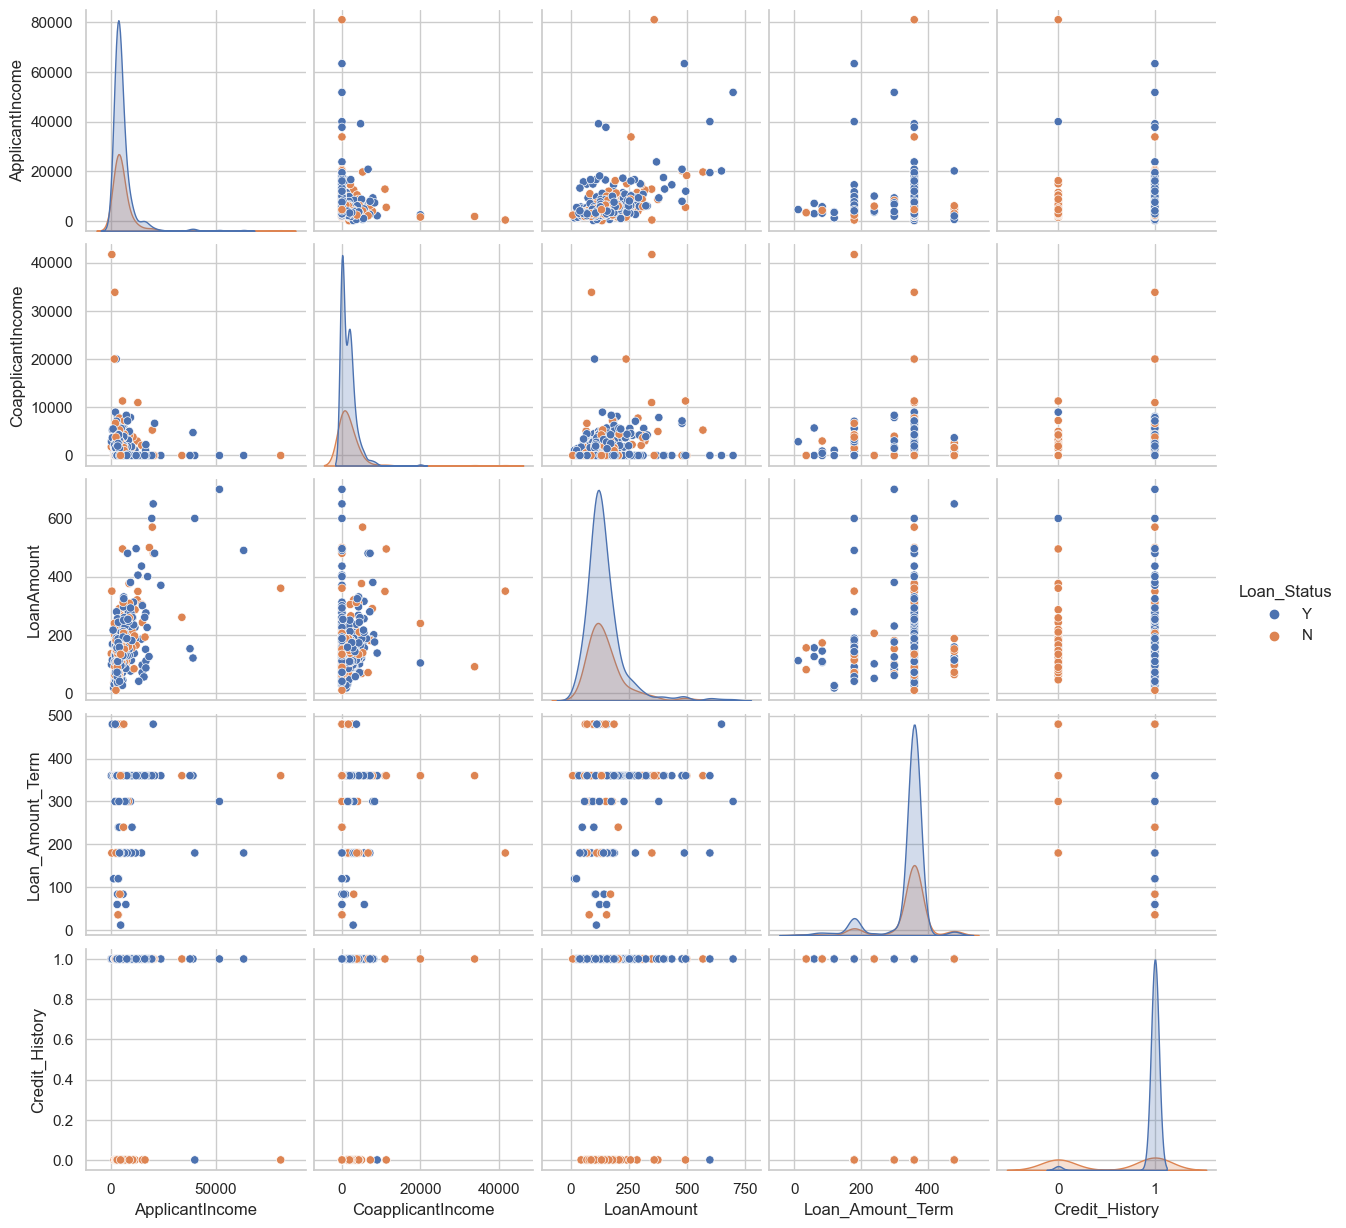

In [143]:
# Use a pairplot to investigate the relationships between the numerical variables in the dataset.
# Hue is used on "Loan_Status" to see how loan approval status relates to pairs of numerical variables.
bivariate_pairplot = sns.pairplot(data, diag_kind= 'kde', hue = 'Loan_Status')

In [130]:
# Store categorical columns in a list that the following functions will enumerate through to generate visualizations
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']

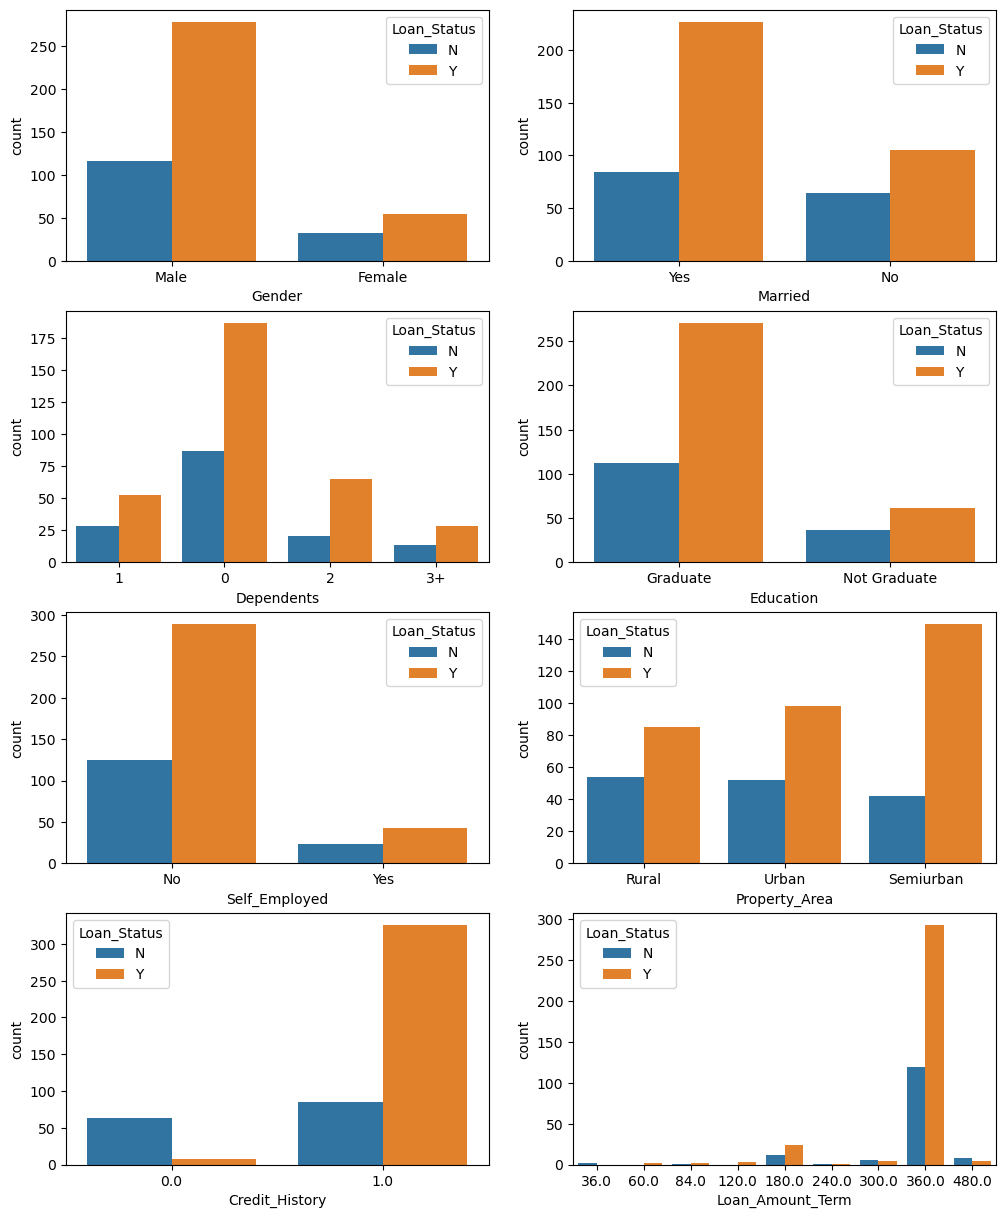

In [173]:
# Create countplots to display the distribution of the categorical variables with color-coded bars indicating loan approval status
fig,axes = plt.subplots(4,2,figsize=(12,15))
for item,categorical_column in enumerate(categorical_columns):
    row,col = item//2,item%2
    sns.countplot(x=categorical_column, data=data_cleaned, hue='Loan_Status', ax=axes[row,col])

In [160]:
# Calculate the exact proportions for each of the categorical columns broken down by Loan_Status
for column in categorical_columns[:7]:
    print(f"Proportions for {column} based on Loan_Status:")
    proportions = data_cleaned.groupby([column, 'Loan_Status']).size().unstack()  # Group by and unstack for proportions
    proportions = proportions.div(proportions.sum(axis=1), axis=0) * 100  # Calculate proportions as percentages
    print(proportions)
    print('')

Proportions for Gender based on Loan_Status:
Loan_Status          N          Y
Gender                           
Female       37.209302  62.790698
Male         29.441624  70.558376

Proportions for Married based on Loan_Status:
Loan_Status          N          Y
Married                          
No           37.869822  62.130178
Yes          27.009646  72.990354

Proportions for Dependents based on Loan_Status:
Loan_Status          N          Y
Dependents                       
0            31.751825  68.248175
1            35.000000  65.000000
2            23.529412  76.470588
3+           31.707317  68.292683

Proportions for Education based on Loan_Status:
Loan_Status           N          Y
Education                         
Graduate      29.242820  70.757180
Not Graduate  37.113402  62.886598

Proportions for Self_Employed based on Loan_Status:
Loan_Status            N          Y
Self_Employed                      
No             30.193237  69.806763
Yes            34.848485  65.151

# Encoding Categorical Variables as Numerical Variables

In [50]:
# Create a copy of the cleaned dataset. Having a seperate variable will make it easier to perform EDA on the data with/without the label encoding
data_cleaned_numeric = data_cleaned.copy()  # Create a copy of the original DataFrame

In [51]:
# Perform label encoding on categorical variables in a DataFrame using the LabelEncoder
le = LabelEncoder()
data_cleaned_columns = data_cleaned_numeric.columns.tolist()
for column in data_cleaned_columns:
    if data_cleaned_numeric[column].dtype == 'object':
        data_cleaned_numeric[column] = le.fit_transform(data_cleaned_numeric[column])

In [123]:
# Check to see if the label encoding function was sucessful
data_cleaned_numeric.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [124]:
# Visual check to see if the label encoding function was sucessful
data_cleaned_numeric.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1


In [254]:
# Save the labled cleaned data into an excel file
data_cleaned_numeric.to_excel('loan_data_cleaned_numeric.xlsx', index=False)

**Recreate the pairplot and correlation visualizations using the label encoded dataset** <br>
Find the visualizations below insights:
* The heatmap visualizes the correlations between the variables in the dataframe, the range can be between -1 and +1.
   * 'Credit_History' stands out as the most influential factor, while other factors have relatively weak correlations with 'Loan_Status'
   * Other variables exhibit weak correlations with loan approval, implying that they have limited influence on the approval decision.
 * The pairplot diagram investigates the relationships between the numerical variables in the dataset.
   * Again, 'Credit_History' significantly influences loan approval, as applicants without a credit history typically face denials regardless of the distribution of other variables, with only a few exceptions.
   * The pairplot re-emphasizes the lack of correlations that were indicated in the heatmap. The visualization doesn't display any obvious trends/patterns.

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.217510,0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,0.386367,0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Dependents,0.217510,0.386367,1.000000,0.028608,0.045754,0.131139,-0.000318,0.172780,-0.096361,-0.026651,0.001191,0.035428
Education,0.059245,0.001652,0.028608,1.000000,-0.005085,-0.131172,-0.074499,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437
Self_Employed,-0.002761,0.015674,0.045754,-0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.032644,0.036717,0.131139,-0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.156171,0.102950,-0.000318,-0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.098975,0.183442,0.172780,-0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.096361,-0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,-0.026651,-0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390


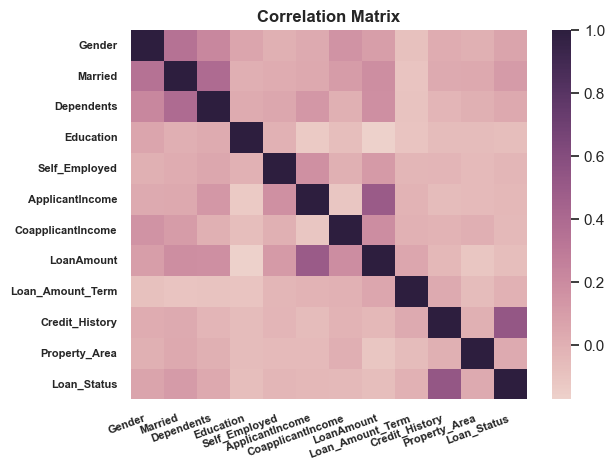

In [173]:
# Discover correlations between the variables using correlation matrix
corrmat = sns.heatmap(data_cleaned_numeric.corr(), cmap=sns.cubehelix_palette(as_cmap=True))
corrmat.set_xticklabels(corrmat.get_xticklabels(), fontsize=8, weight='bold', rotation=20, horizontalalignment='right')
corrmat.set_yticklabels(corrmat.get_yticklabels(), fontsize=8, weight='bold', rotation=0, horizontalalignment='right')
corrmat.set_title('Correlation Matrix', weight='bold')
plt.figure

# Display the exact correlations between the variables
data_cleaned_numeric.corr()

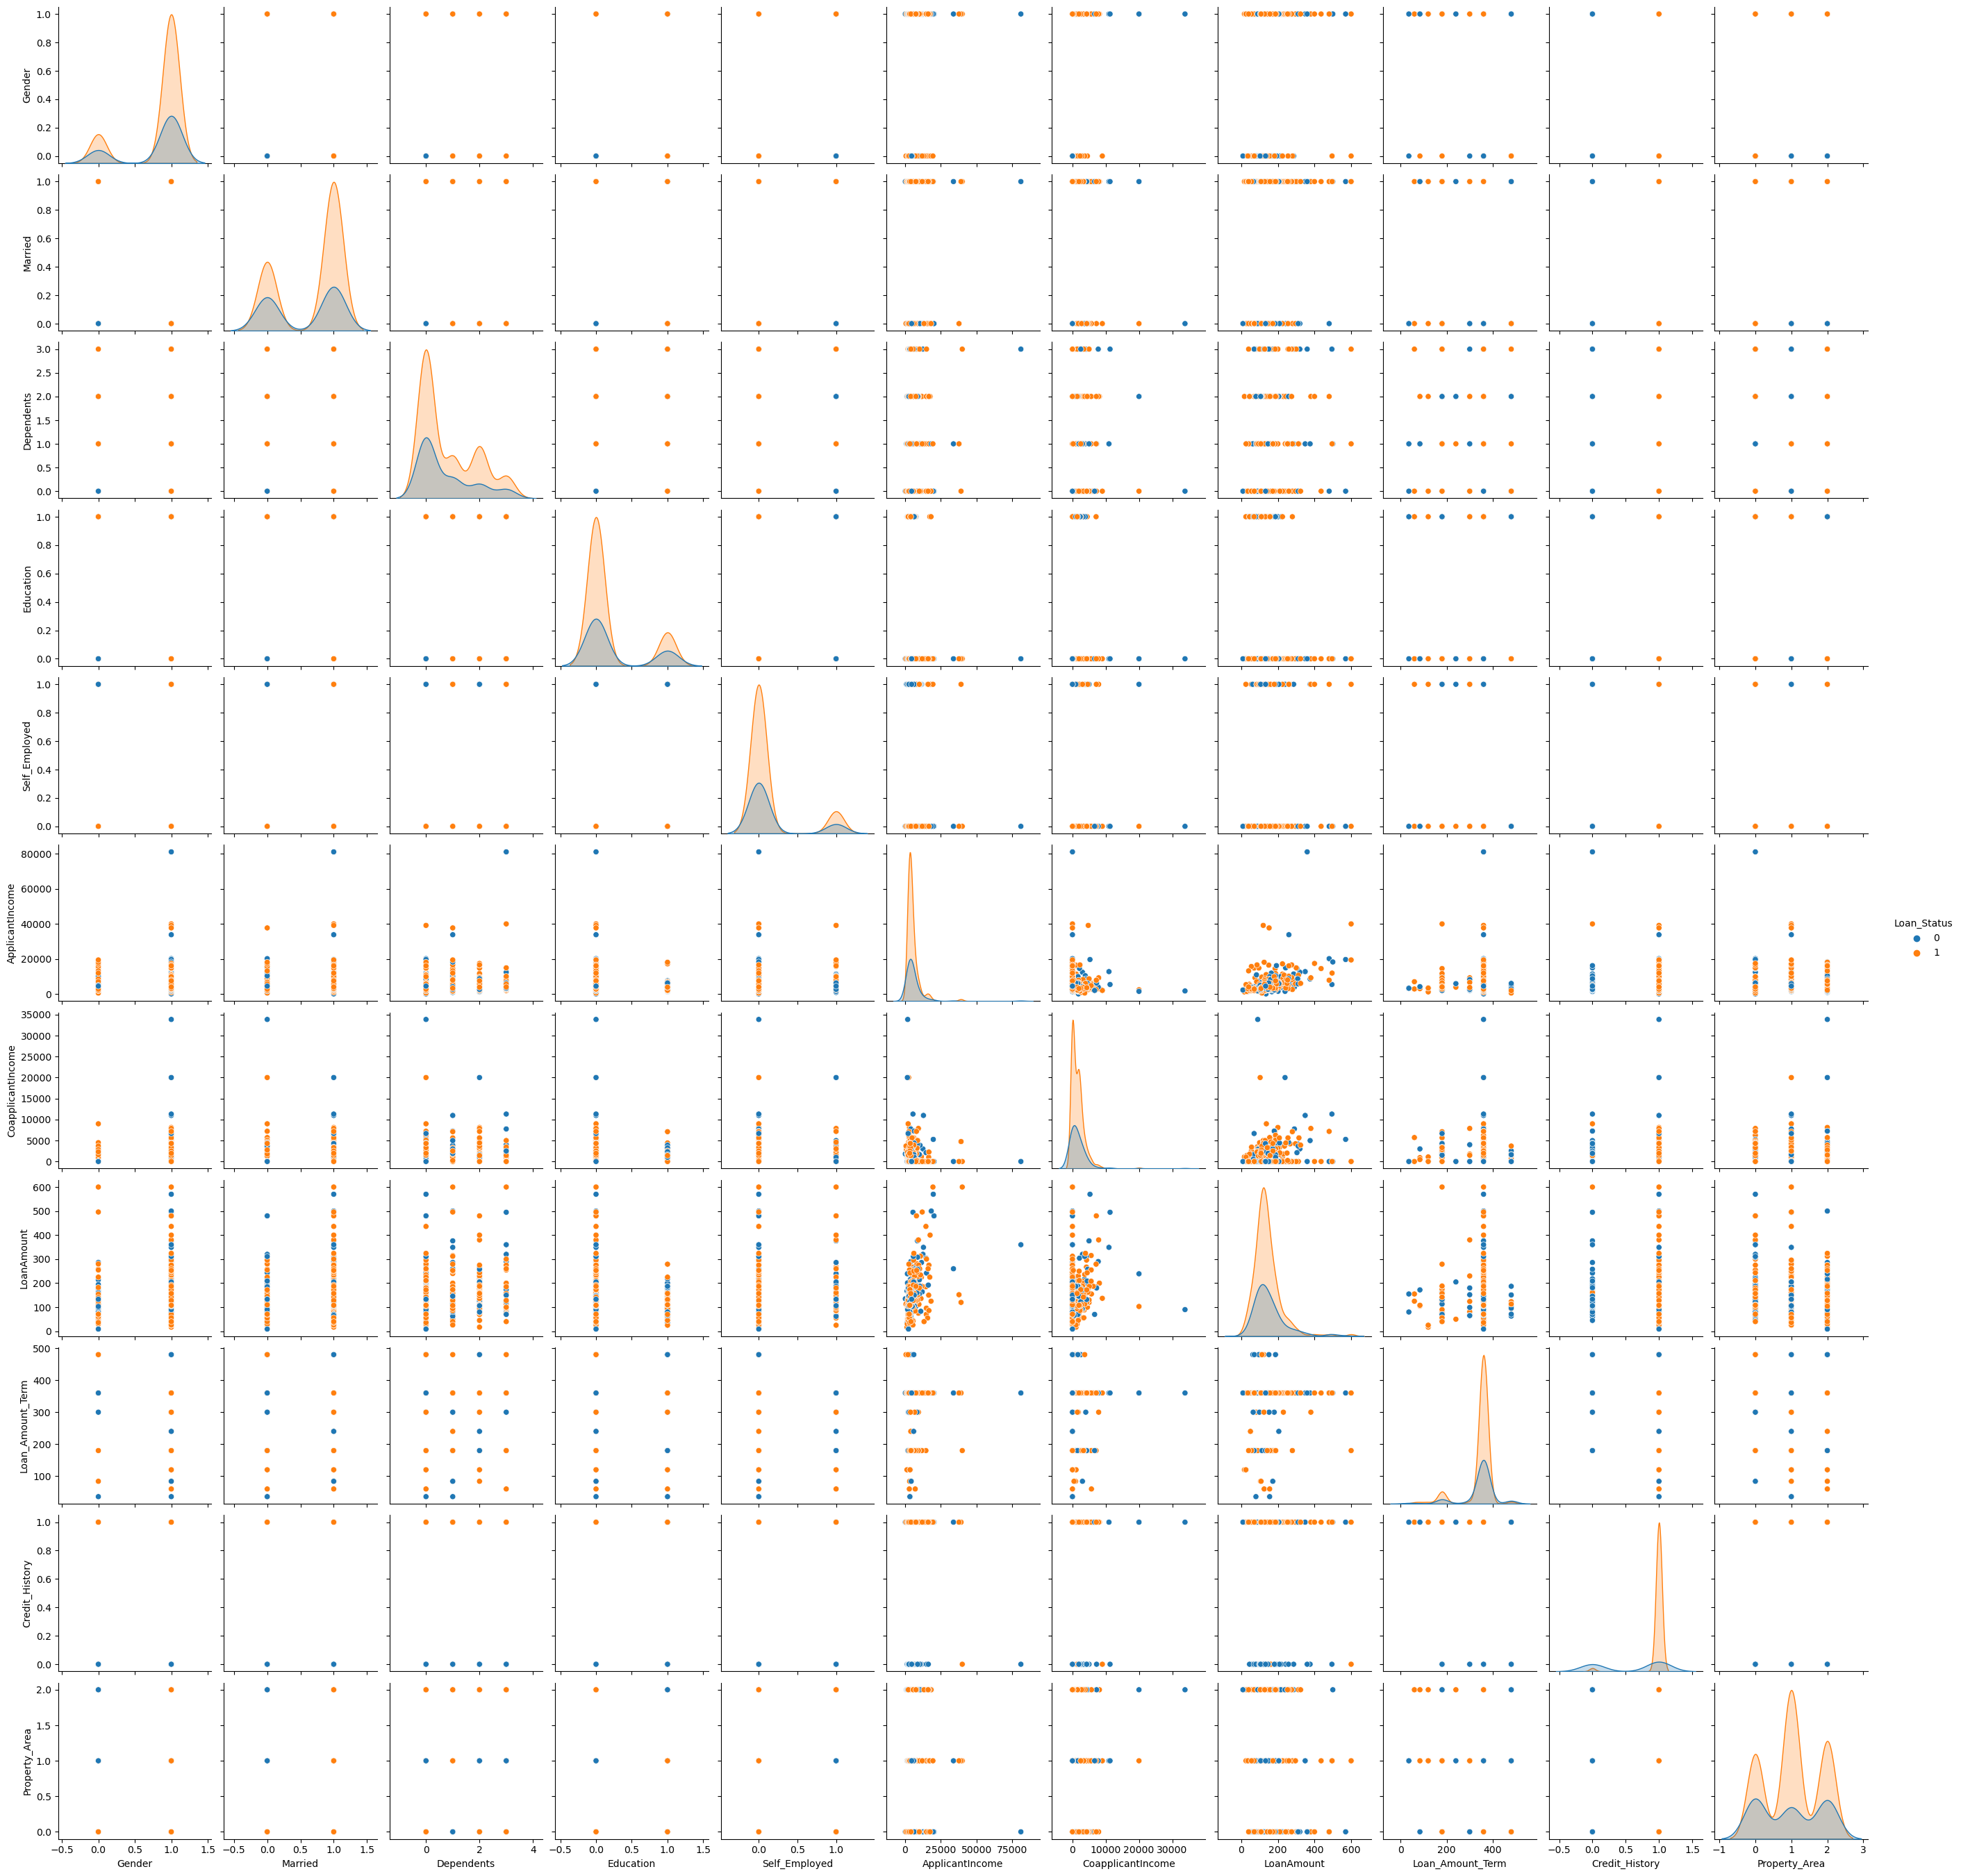

In [55]:
# Use a pairplot to investigate the relationships between the numerical variables in the dataset.
# Hue is used on "Loan_Status" to see how loan approval status relates to pairs of numerical variables.
bivariate_pairplot = sns.pairplot(data_cleaned_numeric, diag_kind= 'kde', hue = 'Loan_Status')